In [1]:
import torch
import torch.optim

import STL_v1 as S

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
device

device(type='cuda', index=0)

In [3]:
train_load, test_load = S.get_stl_loaders(download=True)

Files already downloaded and verified


In [3]:
model = S.STLAutoEncoder(180).to(device)
epoch = 0
opt = torch.optim.Adam(model.parameters(), lr=0.001)

Files already downloaded and verified


In [5]:
for _ in range(50):
    S.train(model, device, train_load, opt, epoch)
    S.test(model, device, train_load)
    epoch += 1

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


Train Epoch: 0 [0/105000 (0%)]	Loss: 0.693074


KeyboardInterrupt: 

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


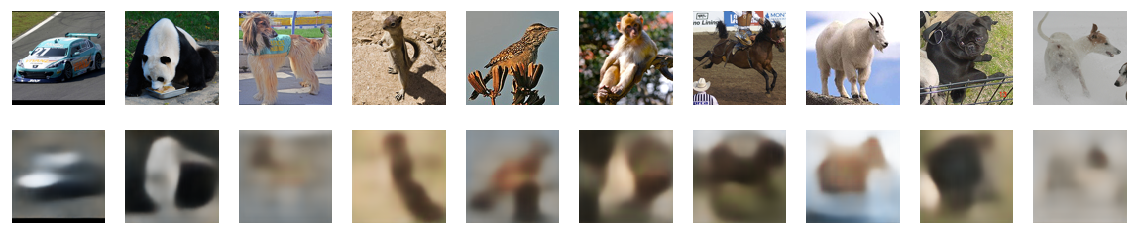

In [13]:
S.show_true_and_recreated_imgs(model, train_load, device)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


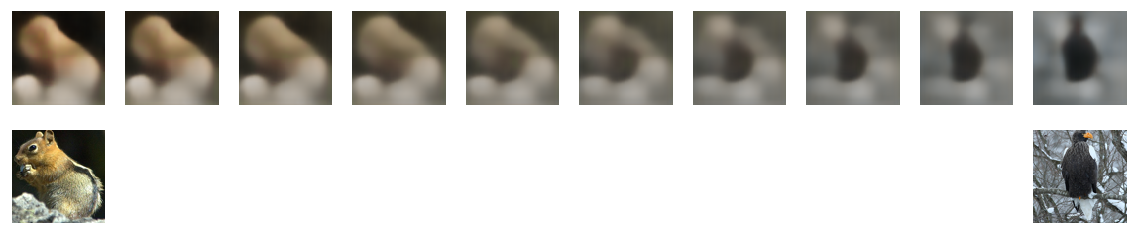

In [17]:
S.show_transition(model, train_load, device)

In [18]:
with open('stl_1.pth', 'wb') as f:
    torch.save(model, f)

In [4]:
model2 = torch.load('stl_1.pth').to(device)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


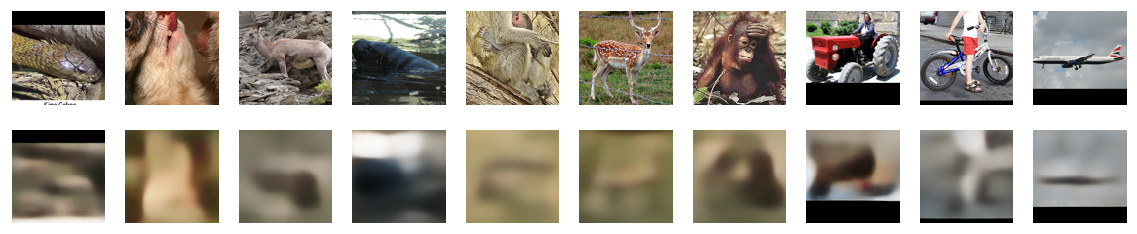

In [5]:
S.show_true_and_recreated_imgs(model2, train_load, device)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


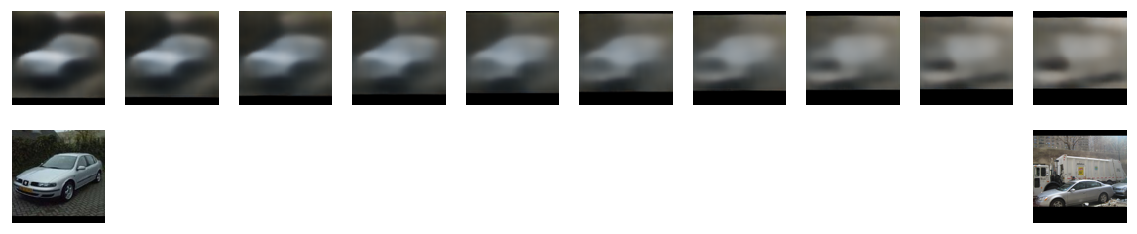

In [13]:
S.show_transition(model2, train_load, device)

In [9]:
n = 11
for i in range(1, n-1):
    print((n-i-1) / (n-1), (i/(n-1)))

0.9 0.1
0.8 0.2
0.7 0.3
0.6 0.4
0.5 0.5
0.4 0.6
0.3 0.7
0.2 0.8
0.1 0.9
